In [2]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

#### Q1. Loading Data 

Run the below cell to load CIFAR-10 train and test data. 
Answer the corresponding questions in the overleaf document

In [3]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(len(train_data))
print(len(test_data))

Files already downloaded and verified
Files already downloaded and verified
50000
10000


### Helper function 
To display images in the training set

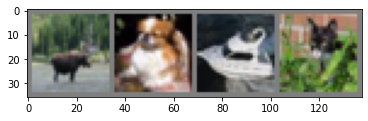

 deer   dog  ship   cat


In [3]:
# function to display images in the training set 
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture 

In [18]:
## Defining Classifier architecture 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU 

[1, 250] loss: 2.301
[1, 500] loss: 2.302
[1, 750] loss: 2.298
[1, 1000] loss: 2.293
[1, 1250] loss: 2.287
[1, 1500] loss: 2.256
[1, 1750] loss: 2.152
[1, 2000] loss: 2.083
[1, 2250] loss: 1.969
[1, 2500] loss: 1.940
[1, 2750] loss: 1.898
[1, 3000] loss: 1.924
[1, 3250] loss: 1.885
[1, 3500] loss: 1.835
[1, 3750] loss: 1.775
[1, 4000] loss: 1.780
[1, 4250] loss: 1.754
[1, 4500] loss: 1.769
[1, 4750] loss: 1.706
[1, 5000] loss: 1.655
[1, 5250] loss: 1.722
[1, 5500] loss: 1.630
[1, 5750] loss: 1.639
[1, 6000] loss: 1.632
[1, 6250] loss: 1.630
[1, 6500] loss: 1.648
[1, 6750] loss: 1.581
[1, 7000] loss: 1.616
[1, 7250] loss: 1.602
[1, 7500] loss: 1.535
[1, 7750] loss: 1.515
[1, 8000] loss: 1.545
[1, 8250] loss: 1.537
[1, 8500] loss: 1.541
[1, 8750] loss: 1.485
[1, 9000] loss: 1.482
[1, 9250] loss: 1.548
[1, 9500] loss: 1.505
[1, 9750] loss: 1.512
[1, 10000] loss: 1.490
[1, 10250] loss: 1.448
[1, 10500] loss: 1.459
[1, 10750] loss: 1.472
[1, 11000] loss: 1.496
[1, 11250] loss: 1.515
[1, 115

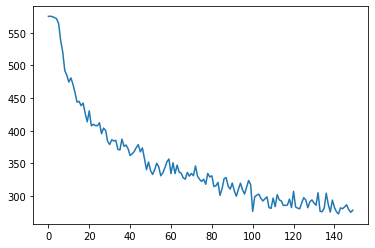

In [24]:
### Complete the code in the training box 

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        pred = net(inputs)
        loss = criterion(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve
plot_loss_curve(running_loss_list)
plt.savefig('Images/3.png')

(ii) Paste the above code in the code block below and modify it to use GPUs for training 


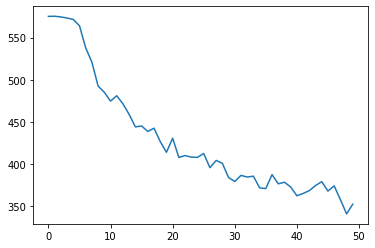

In [20]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs
def plot_loss_curve(running_loss_list):
  plt.plot(running_loss_list)

plot_loss_curve(running_loss_list)

### Testing the network

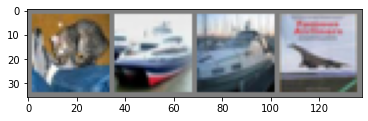

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car  ship plane


In [21]:
## displaying images from test set 
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output 
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set. 

In [22]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc = correct / total ## stores the accuracy computed in the above loop 
print(f'Accuracy of the network on the 10000 test images: {acc * 100}%')

Accuracy of the network on the 10000 test images: 48.29%


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set. 

In [9]:
def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth', img_save_path='./loss.png'):
  """
  INPUTS 
  num_epochs: number of training epochs
  use_gpu: False by default. If true, load the model and data to GPU for training
  lr: learning rate for SGD optimizer
  momentum: momentum for SGD optimizer
  model_save_path: save path for the trained model 

  OUTPUTS
  returns running_loss_list: which stores the loss averaged over a minibatch of size 250
  """

  ## for reproducibility
  torch.manual_seed(7)
  np.random.seed(7)

  ## Instantiating classifier
  net = Net().cuda()

  ## Defining optimizer and loss function
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

  running_loss_list = [] # list to store running loss in the code below 
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          pred = net(inputs.cuda())
          loss = criterion(pred, labels.cuda())
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          # print statistics
          running_loss += loss.cpu().item()
          if i % 250 == 249:    # print every 250 mini-batches
              print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
              running_loss_list.append(running_loss)
              running_loss = 0.0
  
  # plot_loss_curve(running_loss_list)
  plt.plot(running_loss_list)
  plt.savefig(img_save_path)
  #plt.close()

  import pickle
  with open(img_save_path + '.pickle', 'wb') as fp:
    pickle.dump(running_loss_list, fp)
              
  print('Training Complete')
  torch.save(net.state_dict(), model_save_path)
  
  ## complete the code. 
  return running_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):
  net = Net()
  net.load_state_dict(torch.load(model_path))
  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  acc = correct / total ## stores the accuracy computed in the above loop 
  print(f'Accuracy of the network on the 10000 test images: {acc * 100}%')

[1, 250] loss: 2.303
[1, 500] loss: 2.301
[1, 750] loss: 2.296
[1, 1000] loss: 2.291
[1, 1250] loss: 2.266
[1, 1500] loss: 2.213
[1, 1750] loss: 2.082
[1, 2000] loss: 2.024
[1, 2250] loss: 1.970
[1, 2500] loss: 1.962
[1, 2750] loss: 1.890
[1, 3000] loss: 1.801
[1, 3250] loss: 1.842
[1, 3500] loss: 1.773
[1, 3750] loss: 1.768
[1, 4000] loss: 1.702
[1, 4250] loss: 1.698
[1, 4500] loss: 1.713
[1, 4750] loss: 1.704
[1, 5000] loss: 1.695
[1, 5250] loss: 1.644
[1, 5500] loss: 1.642
[1, 5750] loss: 1.674
[1, 6000] loss: 1.627
[1, 6250] loss: 1.586
[1, 6500] loss: 1.560
[1, 6750] loss: 1.584
[1, 7000] loss: 1.524
[1, 7250] loss: 1.553
[1, 7500] loss: 1.563
[1, 7750] loss: 1.557
[1, 8000] loss: 1.548
[1, 8250] loss: 1.485
[1, 8500] loss: 1.520
[1, 8750] loss: 1.531
[1, 9000] loss: 1.531
[1, 9250] loss: 1.517
[1, 9500] loss: 1.482
[1, 9750] loss: 1.541
[1, 10000] loss: 1.491
[1, 10250] loss: 1.409
[1, 10500] loss: 1.515
[1, 10750] loss: 1.459
[1, 11000] loss: 1.456
[1, 11250] loss: 1.489
[1, 115

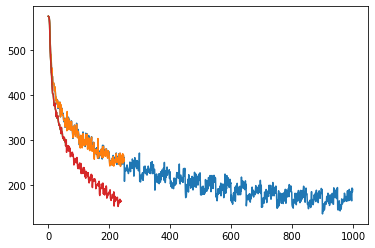

In [10]:
# Batch Size, Epochs
training_params = [(4, 20), (4, 5), (16, 5), (16, 20)]

for batch_size, epochs in training_params:
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
  train(train_loader=train_loader, num_epochs=epochs, use_gpu=False, lr=0.001, momentum=0.9, model_save_path=f'./net-{batch_size}-{epochs}.pth', img_save_path=f'./loss-{batch_size}-{epochs}.png')

In [12]:
import pickle
for batch_size, epochs in training_params:
  with open(f'./loss-{batch_size}-{epochs}.png' + '.pickle', "rb") as fp:
    l = pickle.load(fp)
  plt.plot(l)
  plt.savefig(f'./loss-{batch_size}-{epochs}.png')
  plt.clf()
  print(f"Batch Size: {batch_size}, Epochs: {epochs}")
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)
  test(test_loader=test_loader, model_path=f'./net-{batch_size}-{epochs}.pth')

Batch Size: 4, Epochs: 20
Accuracy of the network on the 10000 test images: 60.74%
Batch Size: 4, Epochs: 5
Accuracy of the network on the 10000 test images: 61.89%
Batch Size: 16, Epochs: 5
Accuracy of the network on the 10000 test images: 57.120000000000005%
Batch Size: 16, Epochs: 20
Accuracy of the network on the 10000 test images: 65.01%


<Figure size 432x288 with 0 Axes>